In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
math = files.upload()

Saving student-mat.csv to student-mat.csv


In [3]:
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


***Target Variable for Regression: Final Grade (G3)***

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_labeled = df.copy()
for c in df.columns:
    if df_labeled[c].dtypes =='O':
        df_labeled[c] = le.fit_transform(df_labeled[c])
df_labeled.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,ever_absent,absence_binned
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,"(4.0, 10.0]"
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,"(2.0, 4.0]"
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,"(4.0, 10.0]"
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,"(-0.001, 2.0]"
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,"(2.0, 4.0]"


# Eda

## School and Absences

Ttest_indResult(statistic=0.9555475253722291, pvalue=0.3431316933314036)


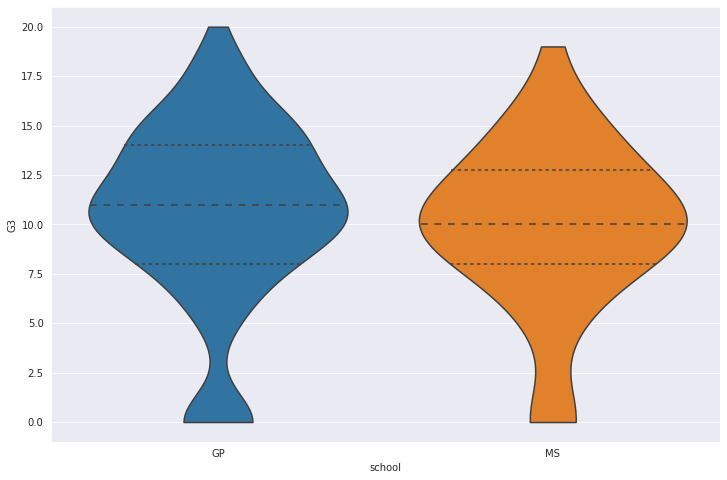

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot(df['school'], df['G3'], ax=ax, cut=0, inner='quartile')

from scipy.stats import ttest_ind


print(ttest_ind(np.array(df.G3[df.school=='GP']), np.array(df.G3[df.school=='MS']), equal_var=False))

    ANOVA Aanalysis Results
    - The school the student attended did not seem to affect the final grade they recieved

In [6]:
def ever_absent(x):
    if x > 0:
        x = 1
    elif x == 0:
        x = 0
    return x
df['ever_absent'] = df.absences.map(ever_absent)
df['absence_binned'] = pd.qcut(df.absences, 5, duplicates='drop')
df.ever_absent.value_counts()

1    280
0    115
Name: ever_absent, dtype: int64

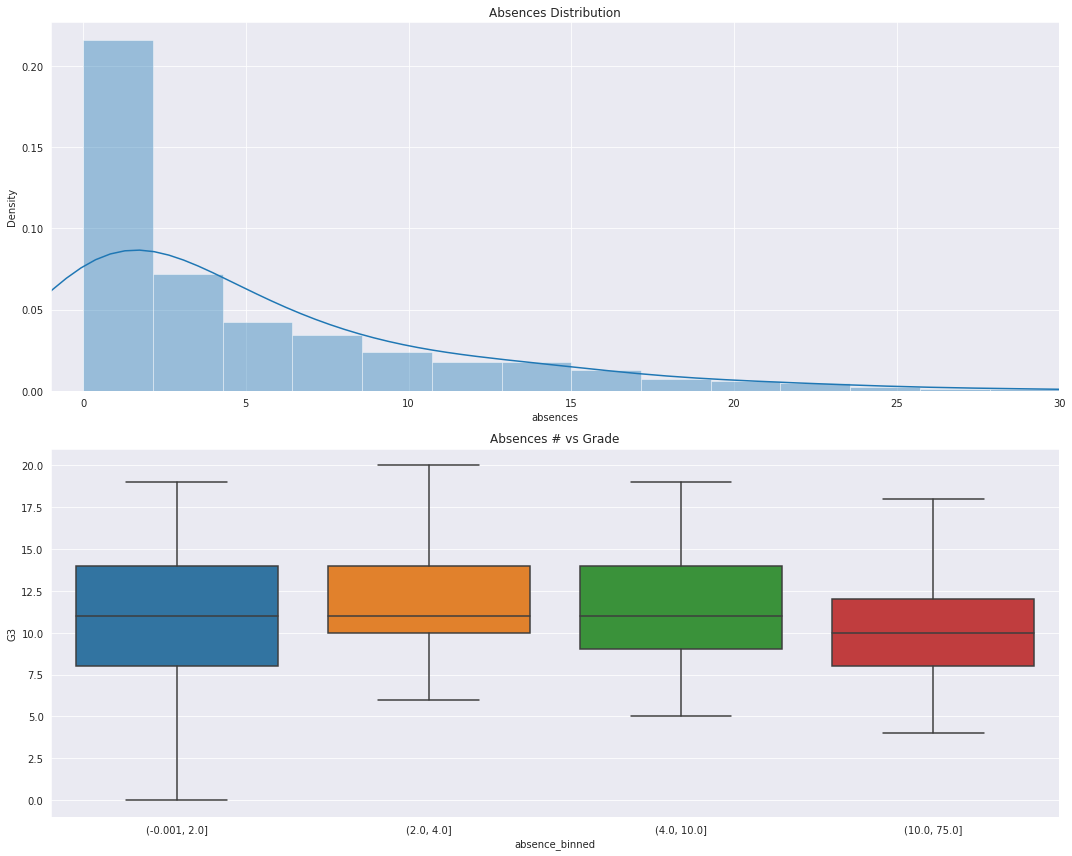



                        sum_sq     df         F    PR(>F)
C(absence_binned)   216.436047    3.0  3.495362  0.015738
C(school)            20.919500    1.0  1.013527  0.314685
absences              0.330856    1.0  0.016030  0.899316
Residual           8029.079272  389.0       NaN       NaN


In [7]:
fig, ax = plt.subplots(2, figsize=(15, 12))
sns.distplot(df.absences, ax=ax[0])
ax[0].set_title('Absences Distribution')
ax[0].set_xlim(-1,30)

sns.boxplot(x=df.absence_binned, y=df['G3'], ax=ax[1])
ax[1].set_title('Absences # vs Grade')
plt.tight_layout()
plt.show()

print('')
print('')

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

formula = 'G3 ~ C(absence_binned) + absences + C(school)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

    ANOVA Aanalysis Results
    - The amount of absences that a student has, when grouped into 5 
    different categories from, 'rarely absent' to 'frequently absent', 
    seem to have an effect on the final grade of the student

## Mother and Father's Jobs, Family Relationship, Family Support, Guardianship, Family Size

### Family Size

                 sum_sq     df         F    PR(>F)
C(famsize)    54.805658    1.0  2.621832  0.106205
Residual    8215.103203  393.0       NaN       NaN


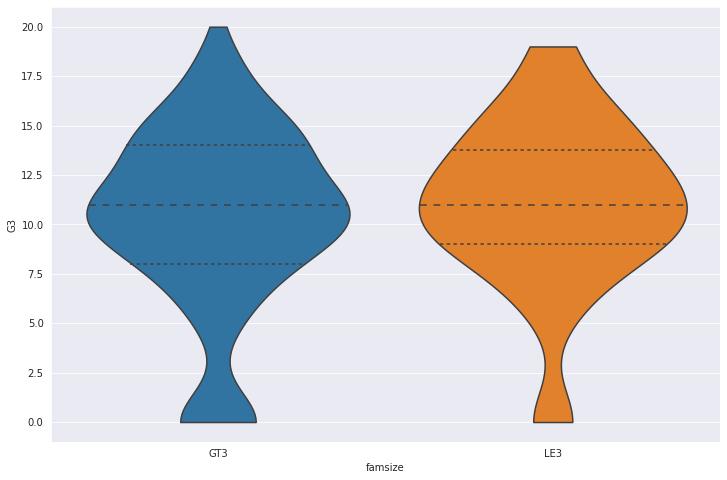

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot(df['famsize'], df['G3'], ax=ax, cut=0, inner='quartile')

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
formula = 'G3 ~ C(famsize)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

### Family Relationship and Family Support

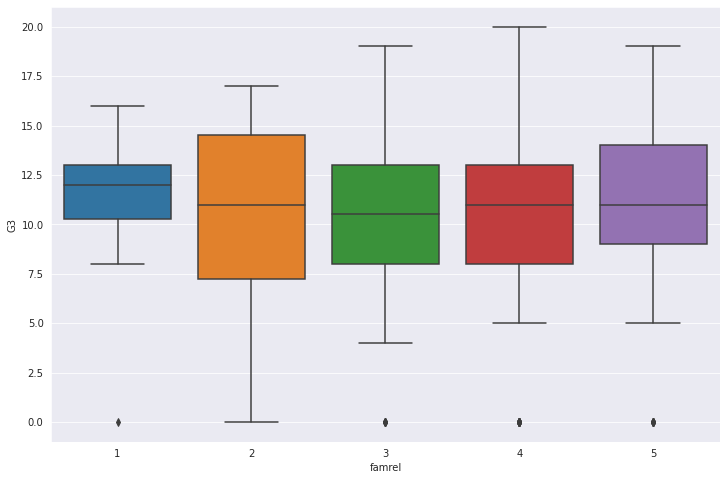

                sum_sq     df         F    PR(>F)
C(famrel)    33.573245    4.0  0.397433  0.810487
Residual   8236.335616  390.0       NaN       NaN



                sum_sq     df         F    PR(>F)
C(famsup)    12.680103    1.0  0.603505  0.437711
Residual   8257.228758  393.0       NaN       NaN



                sum_sq     df         F    PR(>F)
C(famsup)    11.403949    1.0  0.539352  0.463144
C(famrel)    32.297091    4.0  0.381875  0.821596
Residual   8224.931667  389.0       NaN       NaN


In [9]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(df['famrel'], df['G3'], ax=ax)
plt.show()

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
formula = 'G3 ~ C(famrel)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

print('')
print('')
print('')

formula = 'G3 ~ C(famsup)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

print('')
print('')
print('')

formula = 'G3 ~ C(famsup)+C(famrel)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

    ANOVA Analysis results
    1. Family Relationship strength does not seem to have an effect on the final grade of the student

### Mother and Father Occupations

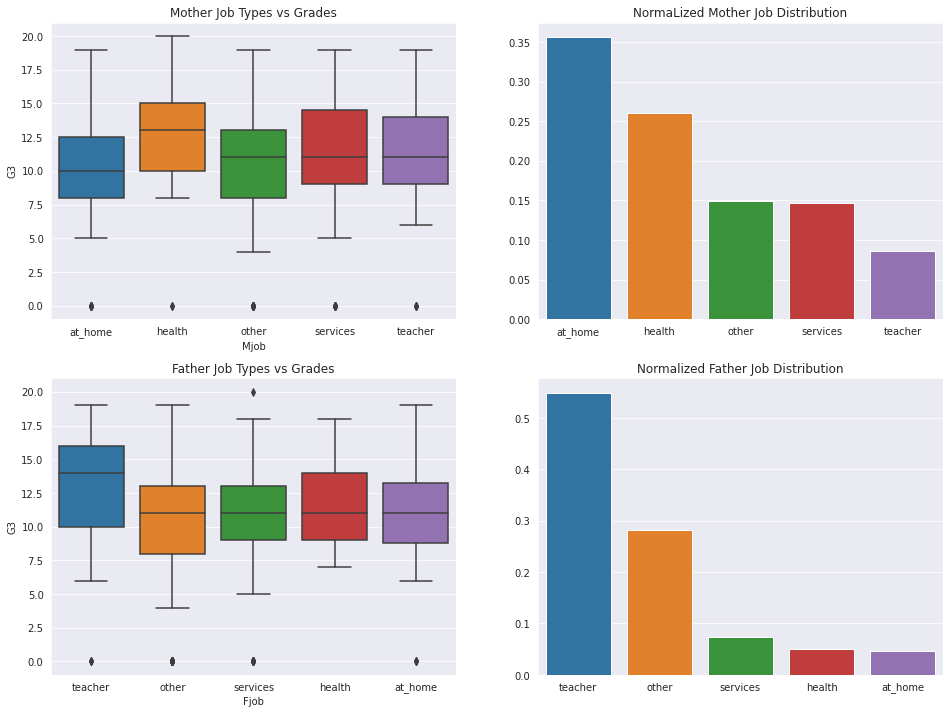



               sum_sq     df        F    PR(>F)
C(Mjob)    306.643668    4.0  3.75446  0.005195
Residual  7963.265193  390.0      NaN       NaN


               sum_sq     df         F    PR(>F)
C(Fjob)    109.055409    4.0  1.302915  0.268314
Residual  8160.853452  390.0       NaN       NaN


               sum_sq     df         F    PR(>F)
C(Fjob)     66.718976    4.0  0.815341  0.515924
C(Mjob)    264.307235    4.0  3.229975  0.012612
Residual  7896.546217  386.0       NaN       NaN


In [10]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))


sns.boxplot(data=df, x='Mjob', y=df.G3, ax=ax[0][0])
ax[0][0].set_title('Mother Job Types vs Grades')
sns.barplot(data=df, x=df['Mjob'].unique(), y=df.Mjob.value_counts(normalize=True).values, ax=ax[0][1])
ax[0][1].set_title('NormaLized Mother Job Distribution')

sns.boxplot(data=df, x='Fjob', y=df.G3, ax=ax[1][0])
ax[1][0].set_title('Father Job Types vs Grades')
sns.barplot(data=df, x=df['Fjob'].unique(), y=df.Fjob.value_counts(normalize=True).values, ax=ax[1][1])
ax[1][1].set_title('Normalized Father Job Distribution')
plt.show()

print('')
print('')

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
formula = 'G3 ~ C(Mjob)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

print('')
print('')

formula = 'G3 ~ C(Fjob)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

print('')
print('')

formula = 'G3 ~ C(Fjob)+C(Mjob)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

    EDA
    1. No particular group stands out except for potentially those whose mothers work in health 
    and fathers work as teachers
    2. A large portion of mothers stayed at home as their occupation (roughly 35%)
    3. An even larger portion of dads were teachers (over 50%)
        This coincides with the high grades of students whos fathers are teachers

 
    ANOVA Analysis results
    1. The mother's occupation does have an effect on the final grade of the student
    2. The father's occupation does **NOT** have an effect on the final grade of the student
    3. Together the correlation drops. Perhaps not using the Father's job type in the model will improve accuracy

### Guardianship

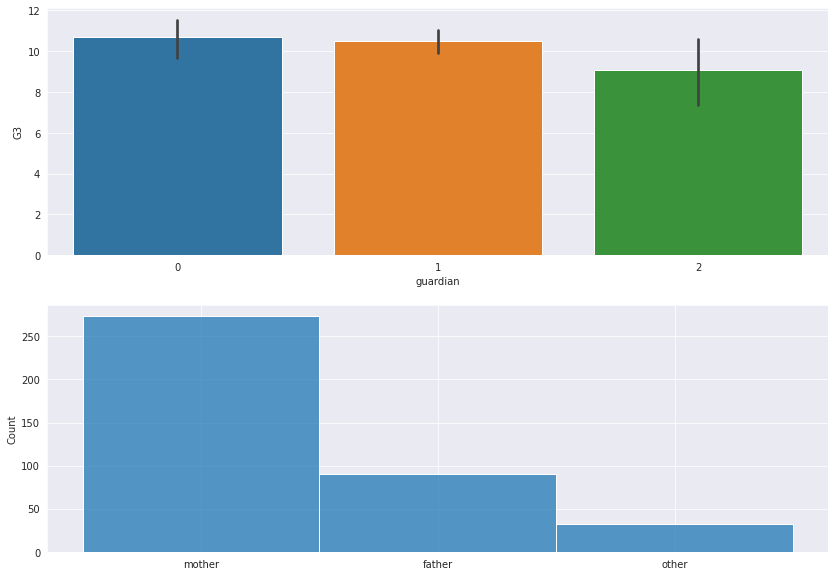

Ttest_indResult(statistic=0.3757125415060742, pvalue=0.7076413897081855)
Ttest_indResult(statistic=1.7060831199913258, pvalue=0.09392574312931481)
Ttest_indResult(statistic=1.624911263407092, pvalue=0.11237945659399717)
ANOVA Test
Guardian ANOVA Test:
                  sum_sq     df         F    PR(>F)
C(guardian)    66.569148    2.0  1.590517  0.205133
Residual     8203.339713  392.0       NaN       NaN


In [11]:
from scipy.stats import ttest_ind
df['guardian'] = le.fit_transform(df['guardian'])

fig, ax = plt.subplots(2,1, figsize=(14, 10))
sns.barplot(df['guardian'], df['G3'], ax=ax[0])
sns.histplot(le.inverse_transform(df['guardian']), ax=ax[1])
plt.show()

print(ttest_ind(np.array(df.G3[df.guardian == 0]), np.array(df.G3[df.guardian == 1]), equal_var=False))
print(ttest_ind(np.array(df.G3[df.guardian == 0]), np.array(df.G3[df.guardian == 2]), equal_var=False))
print(ttest_ind(np.array(df.G3[df.guardian == 1]), np.array(df.G3[df.guardian == 2]), equal_var=False))

print('ANOVA Test')
formula = 'G3 ~ C(guardian)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print('Guardian ANOVA Test:')
print(table)

    T-test Results
    The Welch's T-test shows that there is no 
    statistically significant difference between the grades based on guardianship type

## Time Allocation

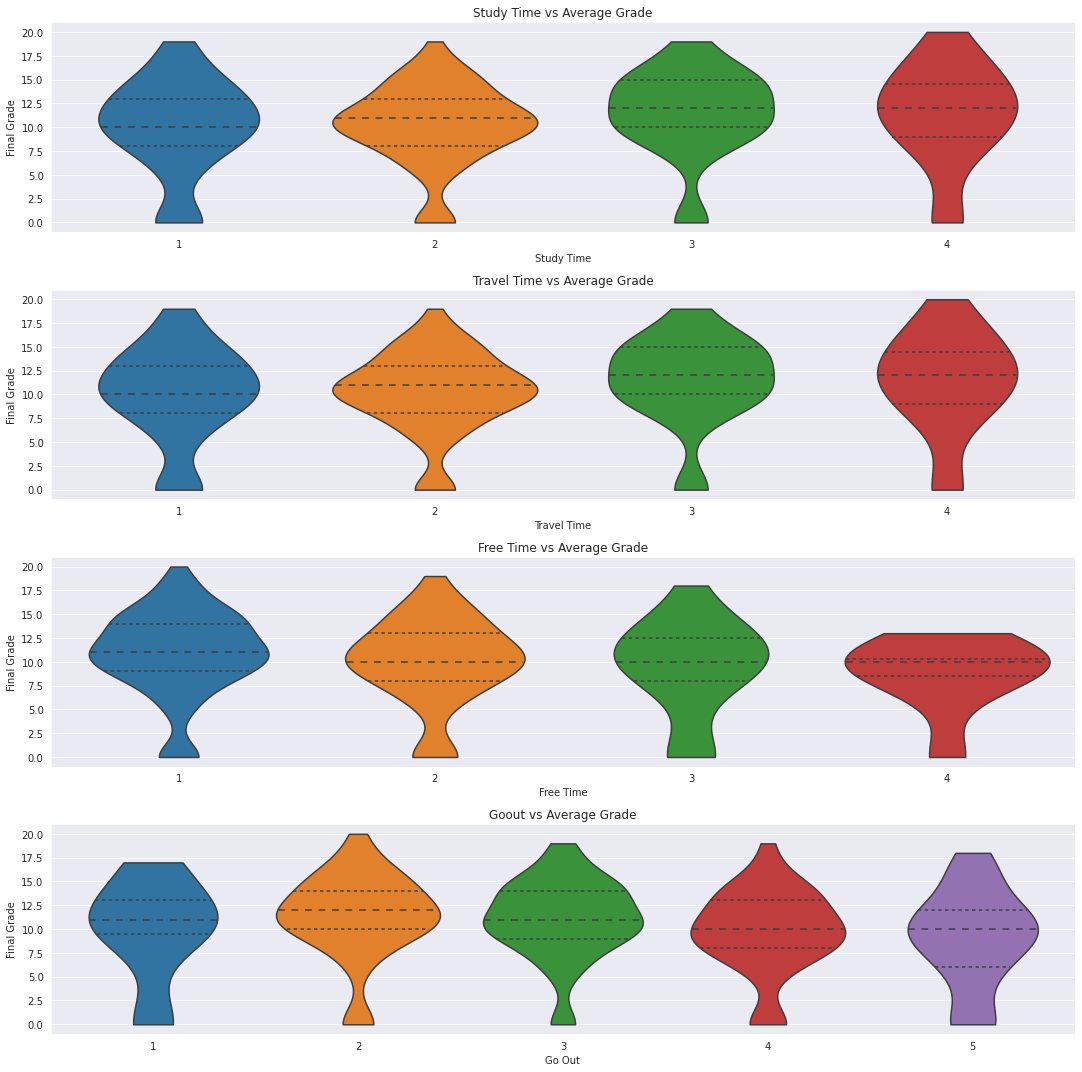

ANOVA Test
Studytime ANOVA Test:
                   sum_sq     df         F    PR(>F)
C(studytime)   108.200155    3.0  1.727835  0.160723
Residual      8161.708706  391.0       NaN       NaN




ANOVA Test
Traveltime ANOVA Test:
                    sum_sq     df         F    PR(>F)
C(traveltime)   115.110992    3.0  1.839751  0.139379
Residual       8154.797869  391.0       NaN       NaN




ANOVA Test
Freetime ANOVA Test:
                  sum_sq     df         F    PR(>F)
C(freetime)   184.473863    4.0  2.224519  0.065744
Residual     8085.434998  390.0       NaN       NaN




Go out ANOVA Test:
               sum_sq     df         F   PR(>F)
C(goout)   258.916556    4.0  3.151216  0.01438
Residual  8010.992305  390.0       NaN      NaN




ANOVA Test for All Time Based Data
Go out ANOVA Test:
                    sum_sq     df         F    PR(>F)
C(freetime)     279.005927    4.0  3.492736  0.008115
C(goout)        268.653361    4.0  3.363138  0.010097
C(studytime)     64.286305   

In [12]:
fig, ax = plt.subplots(4, figsize=(15,15))
sns.violinplot(x=df['studytime'], y=df['G3'], ax=ax[0], cut=0, inner='quartile')

ax[0].set_title('Study Time vs Average Grade')
ax[0].set_xlabel('Study Time')
ax[0].set_ylabel('Final Grade')

sns.violinplot(x=df['studytime'], y=df['G3'], ax=ax[1], cut=0, inner='quartile')

ax[1].set_title('Travel Time vs Average Grade')
ax[1].set_xlabel('Travel Time')
ax[1].set_ylabel('Final Grade')

sns.violinplot(x=df['traveltime'], y=df['G3'], ax=ax[2], cut=0, inner='quartile')

ax[2].set_title('Free Time vs Average Grade')
ax[2].set_xlabel('Free Time')
ax[2].set_ylabel('Final Grade')

sns.violinplot(x=df['goout'], y=df['G3'], ax=ax[3], cut=0, inner='quartile')
ax[3].set_title('Goout vs Average Grade')
ax[3].set_xlabel('Go Out')
ax[3].set_ylabel('Final Grade')

plt.tight_layout()
plt.show()


print('ANOVA Test')
formula = 'G3 ~ C(studytime)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print('Studytime ANOVA Test:')
print(table)


print('')
print('')
print('')
print('')

print('ANOVA Test')
formula = 'G3 ~ C(traveltime)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print('Traveltime ANOVA Test:')
print(table)


print('')
print('')
print('')
print('')

print('ANOVA Test')
formula = 'G3 ~ C(freetime)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print('Freetime ANOVA Test:')
print(table)

print('')
print('')
print('')
print('')


formula = 'G3 ~ C(goout)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print('Go out ANOVA Test:')
print(table)

print('')
print('')
print('')
print('')

print('ANOVA Test for All Time Based Data')
formula = 'G3 ~ C(freetime)+C(goout)+C(studytime)+C(traveltime)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print('Go out ANOVA Test:')
print(table)

print('')
print('')
print('')
print('')




    We will be using the goout data for our model
    
    ANOVA test for all kinds of time related daya results in the conclusion that their interactions do not have a significant affect on the final grade

## Alcohol Consumption

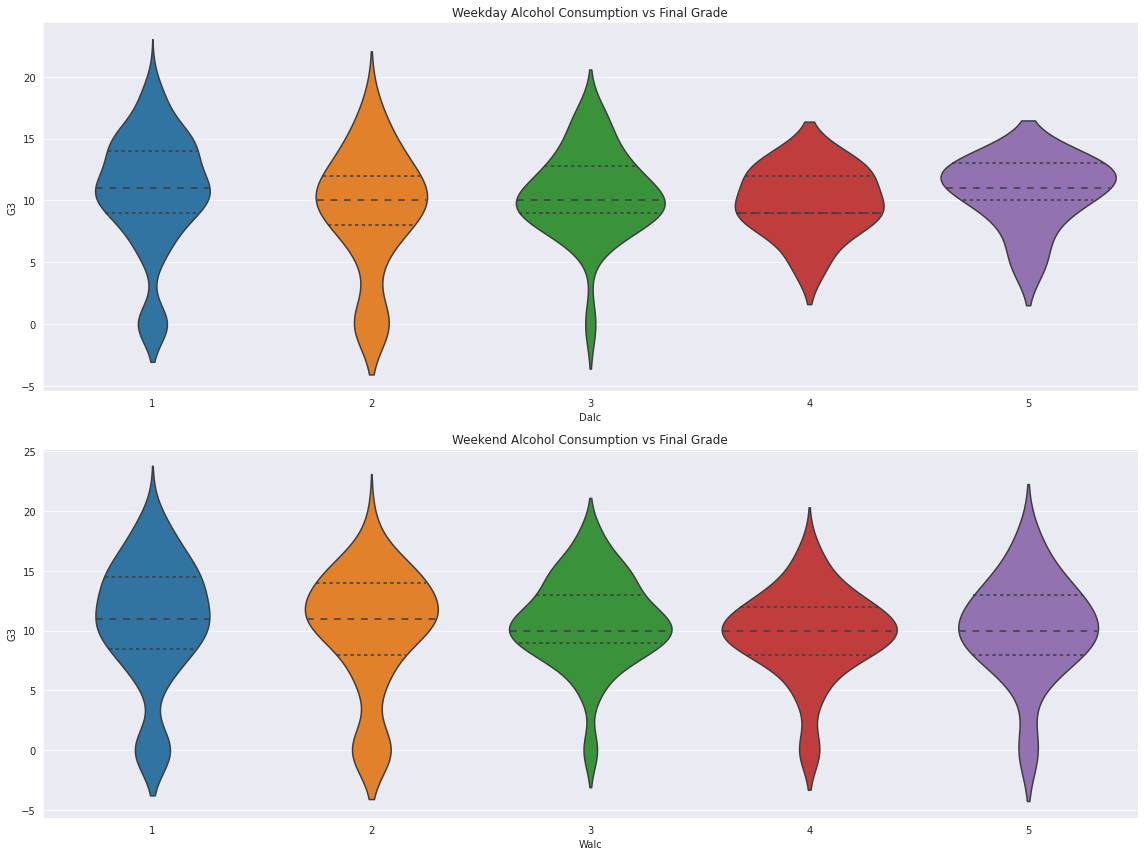




ANOVA Test for Weekday Alcohol Based Data
               sum_sq     df         F    PR(>F)
C(Dalc)    132.173885    4.0  1.583605  0.177864
Residual  8137.734976  390.0       NaN       NaN



ANOVA Test for Weekend Alcohol Based Data
               sum_sq     df         F   PR(>F)
C(Walc)     61.722394    4.0  0.733162  0.56975
Residual  8208.186467  390.0       NaN      NaN



ANOVA Test for All Alcohol Based Data
               sum_sq     df         F    PR(>F)
C(Dalc)    110.691077    4.0  1.319135  0.262181
C(Walc)     40.239587    4.0  0.479546  0.750768
Residual  8097.495389  386.0       NaN       NaN


In [13]:
fig, ax = plt.subplots(2, figsize=(16,12))
sns.violinplot(x=df['Dalc'], y=df['G3'], ax=ax[0], inner='quartile')
sns.violinplot(x=df['Walc'], y=df['G3'], ax=ax[1], inner='quartile')
ax[0].set_title('Weekday Alcohol Consumption vs Final Grade')
ax[1].set_title('Weekend Alcohol Consumption vs Final Grade')
plt.tight_layout()
plt.show()

print('')
print('')
print('')

print('ANOVA Test for Weekday Alcohol Based Data')
formula = 'G3 ~ C(Dalc)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

print('')
print('')
print('')

print('ANOVA Test for Weekend Alcohol Based Data')
formula = 'G3 ~ C(Walc)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

print('')
print('')
print('')

print('ANOVA Test for All Alcohol Based Data')
formula = 'G3 ~ C(Dalc)+C(Walc)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

There are still a bunch of remaining columns to do EDA on

ANOVA Test for Failures
                  sum_sq     df          F        PR(>F)
C(failures)  1137.135742    3.0  20.778271  1.642166e-12
Residual     7132.773118  391.0        NaN           NaN


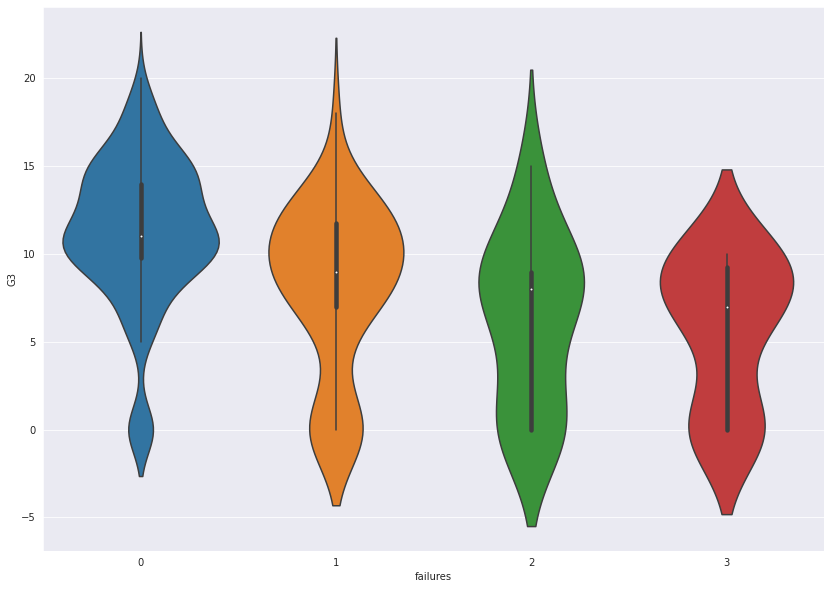

In [14]:
fig, ax = plt.subplots(figsize=(14,10))
sns.violinplot(x=df['failures'], y=df['G3'], ax=ax)

print('ANOVA Test for Failures')
formula = 'G3 ~ C(failures)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

Different categorical levels of failures have a significant affect on the final grade of the student. Let's see if the potential variance explanations between failures, free time, studytime, traveltime, and go out level 

In [15]:
print('ANOVA Test for Failures')
formula = 'G3 ~ C(freetime)+C(goout)+C(studytime)+C(traveltime) + C(failures)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

ANOVA Test for Failures
                    sum_sq     df          F        PR(>F)
C(freetime)     338.549106    4.0   4.852962  7.936112e-04
C(goout)        162.961195    4.0   2.335982  5.504563e-02
C(studytime)     34.860026    3.0   0.666272  5.732007e-01
C(traveltime)    42.651315    3.0   0.815185  4.860691e-01
C(failures)    1013.761805    3.0  19.375812  1.052559e-11
Residual       6575.005253  377.0        NaN           NaN


# Modeling

In [66]:
df_labeled.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'ever_absent'],
      dtype='object')

In [ ]:
# from statsmodels.regression import linear_model
# import statsmodels.api as sm
# import statsmodels.formula.api as smf


# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# x_train, y_train, x_test, y_test = train_test_split(df_labeled, pd.DataFrame(df_labeled.G3))

# # '+'.join(list(df_labeled.columns))
# mod = smf.ols(formula='G3 ~ C(school) + C(sex) + age + C(address) + C(famsize) + C(Pstatus) + C(Medu) + C(Fedu) + C(Mjob) + C(Fjob) + C(reason) + C(guardian) + C(traveltime) + C(studytime) + C(failures) +  (schoolsup) + C(famsup) + C(paid) + C(activities) + C(nursery) + C(higher) + C(internet) + C(romantic) + C(famrel) + C(freetime) + C(goout) + C(Dalc) + C(Walc) + C(health) + absences + G1+ G2', data=df_labeled)
# res = mod.fit()
# print(res.summary())

In [151]:
from statsmodels.regression import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_labeled.drop(columns=['G3', 'G2', 'G1']), df_labeled.G3)

# A constant is needed for the OLS model or else there will be biased
mod = sm.OLS(y_train, sm.add_constant(X_train))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     4.021
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           2.29e-10
Time:                        08:34:15   Log-Likelihood:                -808.42
No. Observations:                 296   AIC:                             1681.
Df Residuals:                     264   BIC:                             1799.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.8736      4.471      2.432      

In [133]:
X.shape

(395, 33)

In [134]:
y.shape

(395,)